# Proyek Analisis Data: Bike-sharing-dataset.zip
- **Nama:** NANTHA SEUTIA
- **Email:** ombakrinai@gmail.com
- **ID Dicoding:** ombakrinai@gmail.com

## Karakteristik Dataset
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Catatan Tambahan:

* 'temp' adalah normalisasi temperatur yang dihitung menggunakan skala. Dalam dataset ini 0 adalah nilai temperatur terendah dan 1 nilai maksimum. Misalkan 'temp' adalah 0,5 berarti suhu tersebut berada di tengah-tengah antara suhu minimum dan maksimum.
* 'atemp' adalah variabel perkiraan suhu lingkungan yang dirasa manusia (dipengaruhi oleh temperatur, kelembaban, dan angin) sehingga membuatnya nyaman beraktifitas. Dalam dataset ini diukur menggunakan skala 0-1.





**Insight**

Karena informasi pada kedua file tersebut relatif sama dan hanya dibedakan dengan variabel 'hr' untuk 'hour.csv', maka diputuskan untuk menggunakan data 'hour.csv' karena memiliki data yang lebih banyak.

## Menentukan Pertanyaan Bisnis

1. Bagaimana perbedaan pola peminjaman sepeda antara pengguna biasa (casual) dibandingkan dengan pengguna terdaftar (registered)
2. Pada jam-jam berapakah dalam sehari terdapat konsentrasi penyewaan sepeda tertinggi untuk pengguna biasa dan pengguna terdaftar.
3. Bisakah kita mengenali anomali atau kejadian besar (seperti cuaca ekstrem atau hari libur nasional) berdasarkan lonjakan atau penurunan tiba-tiba dalam jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import necessary libraries
import pandas as pd
import zipfile
import os
import requests

# Start at cleaning data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

## Data Wrangling

### Gathering Data

In [ ]:
# Gathering Data
# URL of the zip file in your GitHub repository
github_url = 'https://github.com/esnanta/data-analysis/raw/main/Dataset/Bike-sharing-dataset.zip'

# Path to save the zip file
zip_path = '/tmp/Bike-sharing-dataset.zip'

# Download the zip file from GitHub
response = requests.get(github_url)
if response.status_code == 200:
    with open(zip_path, 'wb') as file:
        file.write(response.content)
    print("Dataset downloaded successfully!")
else:
    print("Failed to download the dataset. Check the URL.")

# Extract the zip file to the /tmp directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/tmp')

# File paths for the extracted CSV files
day_csv_path = '/tmp/day.csv'
hour_csv_path = '/tmp/hour.csv'

# Verify extraction
if os.path.exists(day_csv_path) and os.path.exists(hour_csv_path):
    print("Dataset extracted successfully!")
else:
    print("Failed to extract the dataset.")

Dataset downloaded successfully!
Dataset extracted successfully!


In [ ]:
# Read the CSV files using pandas
df_hour_data = pd.read_csv(hour_csv_path, delimiter=",")

# Display the first few rows of each dataframe
print("\nHour Data:")
print(df_hour_data.head())


Hour Data:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
<br>Berdasarkan petunjuk dan data yang ditampilkan, maka data dapat dikelompokkan sebagai berikut:
- Data kontinu : temp, atemp, hum, windspeed
- Data diskret : instant, casual, registered, cnt
- Data ordinal : season, weathersit, weekday
- Data nominal : dteday, yr, mnth, hr, holiday, workingday.

### Assessing Data

In [ ]:
# Assessing Data
# check info
df_hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Memeriksa apakah data ordinal dan nominal memiliki nilai
# yang sesuai dengan petunjuk.
valid_ranges = {
    'season': range(1, 5),         # Seasons: 1 to 4
    'weathersit': range(1, 5),     # Weather situations: 1 to 4
    'weekday': range(0, 7),        # Weekday: 0 (Sunday) to 6 (Saturday)
    'yr': [0, 1],                  # Year: 0 (2011), 1 (2012)
    'mnth': range(1, 13),          # Months: 1 to 12
    'hr' : range(0,24),            # Hour: 24 hour
    'holiday': [0, 1],             # Holiday: 0 (No), 1 (Yes)
    'workingday': [0, 1],          # Working day: 0 (No), 1 (Yes)
}

# List of datasets to check
datasets = {
    "df_hour_data": df_hour_data
}

# Loop through each dataset
for dataset_name, dataset in datasets.items():
    print(f"\nChecking dataset: {dataset_name}")

    # Initialize a report for invalid values
    invalid_values_report = {}

    # Loop through each variable and check for invalid values
    for column, valid_range in valid_ranges.items():
        if column in dataset.columns:
            # Check for invalid values
            invalid_rows = dataset[~dataset[column].isin(valid_range)]
            if not invalid_rows.empty:
                invalid_values_report[column] = invalid_rows

    # Display the results for the current dataset
    if not invalid_values_report:
        print("All ordinal and nominal variables have valid data.")
    else:
        print("The following variables have invalid data:")
        for column, invalid_rows in invalid_values_report.items():
            print(f"Variable '{column}' has invalid values in the following rows:")
            print(invalid_rows)


Checking dataset: df_hour_data
All ordinal and nominal variables have valid data.


In [ ]:
# Casual and registered values: Check for negative values
casual_registered_columns = ['casual', 'registered', 'cnt']

# Casual and registered values: Check for negative values
invalid_casual_registered = df_hour_data[
    (df_hour_data['casual'] < 0) | (df_hour_data['registered'] < 0)
]

if not invalid_casual_registered.empty:
    print("\nInvalid values in casual or registered (negative values):")
    print(invalid_casual_registered)
else:
    print("\nNo invalid values in casual or registered columns.")


No invalid values in casual or registered columns.


In [ ]:
# Function to check if cnt equals casual + registered
def check_discrepancies(df):
    """
    Checks if the 'cnt' column in the dataframe equals the sum of 'casual' and 'registered'.

    Args:
        df (pd.DataFrame): The dataframe containing 'cnt', 'casual', and 'registered' columns.

    Returns:
        None: Prints the result of the check.
    """
    discrepancy = df[df['cnt'] != (df['casual'] + df['registered'])]

    if not discrepancy.empty:
        print(f"\nDiscrepancies found in {len(discrepancy)} rows:")
        print(discrepancy)
    else:
        print("\nNo discrepancies: cnt equals casual + registered for all rows.")

# Check if cnt equals casual + registered
check_discrepancies(df_hour_data)


No discrepancies: cnt equals casual + registered for all rows.


**Insight**
* Tidak ada data yang bernilai null
* Terdapat kesalahan tipe data untuk 'dteday' yang seharusnya memiliki tipe data 'date'.
* Tidak ditemukan nilai yang tidak sesuai ketentuan pada data ordinal dan nominal
* Tidak ada data yang bernilai minus untuk casual, registered, dan cnt
* Nilai cnt sudah sesuai (casual+registered)

In [ ]:
summary = df_hour_data.describe()
print(summary)

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Insight:**
- setiap kolom punya data 17379 yang artinya tidak ada missing value.
- season, yr, mnth, hr terlihat konsisten berdasarkan jumlah data. Perlu analisa distribusi dengan plot frekuensi jika ingin memahami lebih dalam.
- holiday (biner [0,1]) dengan Mean 0,02 menunjukkan jumlah data hari libur yang sedikit. Hari libur bernilai 1 (true).
- weekday Sunday-Saturday (0,6) memiliki Mean 3. Perlu analisa distribusi dengan plot frekuensi jika ingin memahami lebih dalam.
- workingday (biner [0,1]) dengan Mean 0,6 yang berarti lebih banyak hari kerja. Nilai 1 (true) untuk hari kerja.
- weathersit menjelaskan kondisi cuaca dengan rentang 1-4. Nilai Mean 1,4 menunjukkan kondisi cuaca sering cerah atau berawan.
- temp dan atemp memiliki Mean 0,4 yang berarti kondisi cuaca berada di tengah-tengah batas minimal (0) dan maksimal (1).
- humidity dengan Mean 0,6 berarti kelembaban cenderung sedang. Nilai Min : 0 berarti kelembaban kering, dan jika 1 berarti saturasi penuh.
- windspeed dengan Min 0 dan Max 0,8 memiliki Mean mendekati 0,2 yang berarti kondisi kecepatan angin rendah.
- casual punya kemungkinan cenderung ke kanan (right skewed), karena nilai persentil Q1 adalah 4, jauh lebih kecil dari Q3 yang 48. Nilai Standar Deviasi (49) yang lebih besar dari Mean (35) menunjukkan data tersebar luas.
- registered punya kemungkinan cenderung ke kanan (right skewed), karena nilai persentil Q1 adalah 34, jauh lebih kecil dari Q3 yang 220. Nilai Standar Deviasi (151) yang dekat dengan Mean (153) menunjukkan variasi data mendekati Mean.
- cnt (total rental) memiliki variasi sebaran data yang sedang karena Standar Deviasi 181 lebih kecil dan tidak terlalu jauh dari Mean 189. Nilai Min 1 dan Max 977 menunjukkan rentang yang jauh dan kemungkinan memiliki outlier. Nilai persentil Q1 adalah 40, jauh lebih kecil dari Q3 yang 281, sehingga data ada kemungkinan cenderung ke kanan (right skewed). Perlu diingat bahwa data cnt dipengaruhi oleh casual dan registered.

### Cleaning Data

**Define**

1. Kolom 'dteday' bertipe object, sehingga perlu diubah menjadi 'datetime'.

In [ ]:
# Cleaning Data
# 1. Convert 'dteday' to datetime
df_hour_data['dteday'] = pd.to_datetime(df_hour_data['dteday'])

# Verify the change
df_hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

1. Buat visualisasi distribusi data casual dan registered.
2. Buat visualisasi box plot data casual dan registered untuk melihat outier.
3. Gunakan IQR untuk memperbaiki jika ada outlier.
4. Buat visualisi box plot data casual dan registered setelah outlier diperbaiki.
5. Buat visualisasi distribusi data casual dan registered setelah outlier diperbaiki.

### Explore ...

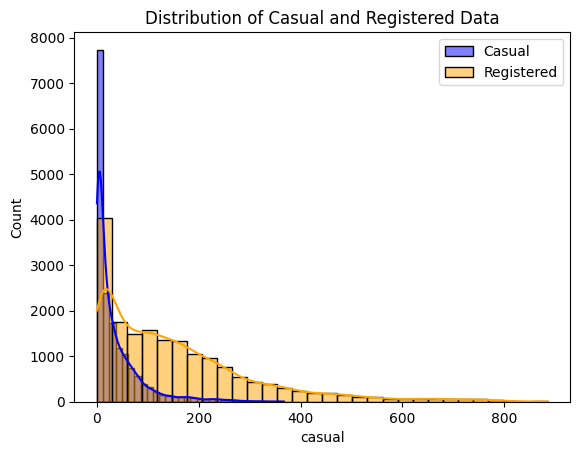

In [ ]:
# 1. Visualize the distribution of casual and registered data
sns.histplot(df_hour_data['casual'], kde=True, bins=30, color='blue', label='Casual')
sns.histplot(df_hour_data['registered'], kde=True, bins=30, color='orange', label='Registered')
plt.legend()
plt.title('Distribution of Casual and Registered Data')
plt.show()

**Insight:**

**Data Casual (Biru)**
1. Ada banyak data dengan frekuensi tinggi di sekitar 0, artinya banyak data dengan sedikit jam rental atau tidak ada rental sama sekali.
2. Distribusi data lebih banyak ke kanan dengan nilai rendah. Right-skewed.


**Data Registered (Oranye)**
1. Data registered memiliki sebaran lebih banyak daripada casual.
2. Nilai yang berada di sekitar angka 0 lebih sedikit dibanding casual, artinya sepeda lebih sering digunakan.
3. Distribusi data lebih banyak ke kanan namun puncaknya lebih rendah daripada casual. Right-skewed.

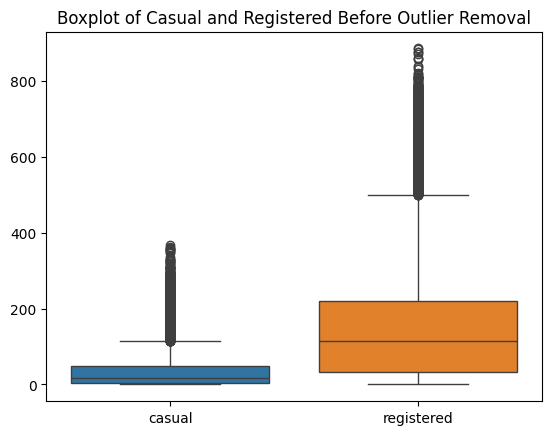

In [ ]:
# 2. Visualize Boxplot before fixing outliers
sns.boxplot(data=df_hour_data[['casual', 'registered']])
plt.title('Boxplot of Casual and Registered Before Outlier Removal')
plt.show()

**Insight:**
**Data Casual (Biru)**
1. Nilai Median sangat dekat dengan Q1, artinya sebagian data casual berada di rentang yang sangat rendah.
2. Bentuk kotak yang kecil menunjukkan tidak banyak varian data.
3. Ada outliers di atas batas atas. Hal itu menunjukkan adanya permintaan sewa yang tinggi dan tidak biasa.

**Data Registered (Biru)**
1. Nilai Median berada dekat di tengah kotak, artinya distribusi data lebih seimbang dibanding casual.
2. Bentuk kotak yang lebih luas menunjukkan variasi data lebih banyak.
3. Ada outliers di atas batas atas. Hal itu menunjukkan adanya permintaan sewa yang tinggi dan tidak biasa.
4. Batas atas registered lebih tinggi dari casual, artinya registered lebih sering menyewa sepeda.

**Komparasi**

* Data registered memiliki jangkauan dan variasi yang jauh lebih tinggi dibandingkan dengan persewaan casual.
* Keduanya mempunyai outliers, tetapi registered lebih banyak.
* Data casual cenderung punya jumlah sewa sedikit, sedangkan registered memiliki jumlah yang lebih tinggi dan konsisten.

In [ ]:
# 3. Check and mark outliers using IQR
# Initialize the 'is_outlier' column with False
df_hour_data['is_outlier'] = False

for column in ['casual', 'registered']:
    Q1 = df_hour_data[column].quantile(0.25)
    Q3 = df_hour_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identify outliers
    outliers = df_hour_data[(df_hour_data[column] < lower_bound) | (df_hour_data[column] > upper_bound)]

    # Mark rows with outliers in the 'is_outlier' column
    df_hour_data.loc[outliers.index, 'is_outlier'] = True

    # Print outlier information
    print(f"Outliers in {column}: {len(outliers)} rows")
    print(f"Outlier values for {column}:")
    print(outliers[[column]])

# Verify the 'is_outlier' column
print(df_hour_data[['casual', 'registered', 'is_outlier']].head())

# Optional: Remove outliers if needed for certain analyses (keeping original dataframe intact)
df_no_outliers = df_hour_data[df_hour_data['is_outlier'] == False]

Outliers in casual: 1192 rows
Outlier values for casual:
       casual
1633      144
1634      149
1635      124
1771      126
1772      174
...       ...
16817     122
16818     148
16819     164
16820     167
16821     139

[1192 rows x 1 columns]
Outliers in registered: 680 rows
Outlier values for registered:
       registered
2995          539
3019          532
3067          540
3187          521
3379          524
...           ...
17063         512
17077         665
17086         536
17087         546
17101         585

[680 rows x 1 columns]
   casual  registered  is_outlier
0       3          13       False
1       8          32       False
2       5          27       False
3       3          10       False
4       0           1       False


**Insight:**
<br>**Casual (Biru)**

* Casual outliers detected: 1,192 rows
* Contoh nilai yang masuk outlier 144, 149, 124, 174.
* Nilai tersebut terlalu tinggi jika dibandingkan dengan distribusi data di IQR yang Median-nya sangat dekat dengan Q1.

**Registered (Oranye)**
* Registered outliers detected: 887 rows
* Contoh nilai yang masuk outlier 455, 463, 486, 665.
* Nilai tersebut terlalu tinggi jika dibandingkan dengan distribusi data di IQR.

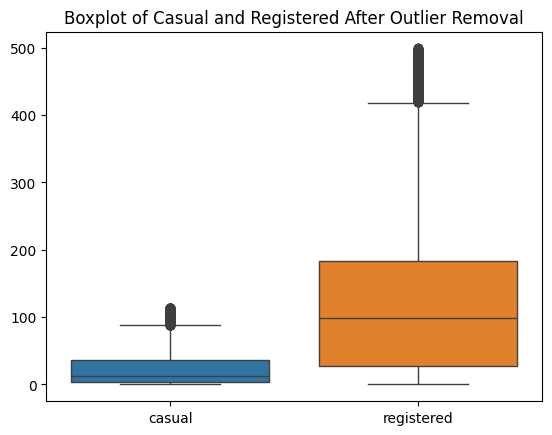

In [ ]:
# 4. Visualize after fixing outliers
# Gunakan variabel "df_no_outliers"
sns.boxplot(data=df_no_outliers[['casual', 'registered']])
plt.title('Boxplot of Casual and Registered After Outlier Removal')
plt.show()

**Insight:**
**Casual (Biru)**

* Banyak penggunaan sepeda terkonsentrasi antara 0-50.
* Setelah penghapusan outliers, puncak data di sekitar 0 terlihat lebih rendah.

**Registered (Oranye)**
* Data penggunaan sepeda terlihat lebih menyebar dalam rentang 0-100.
* Setelah penghapusan outliers, puncak data di sekitar 0 terlihat lebih rendah.

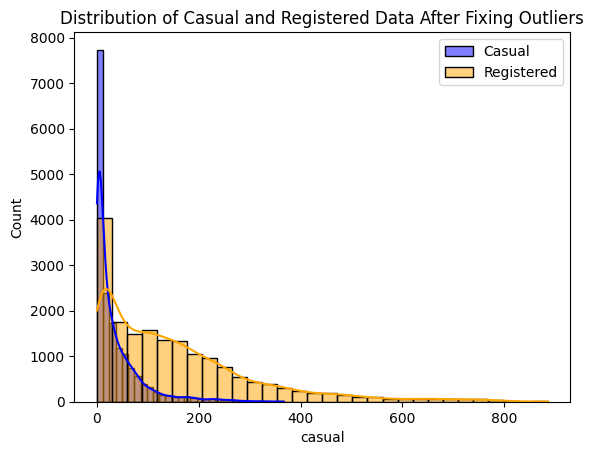

In [ ]:
# 5. Visualize the distribution of casual and registered data after fixing outliers
sns.histplot(df_hour_data['casual'], kde=True, bins=30, color='blue', label='Casual')
sns.histplot(df_hour_data['registered'], kde=True, bins=30, color='orange', label='Registered')
plt.legend()
plt.title('Distribution of Casual and Registered Data After Fixing Outliers')
plt.show()

**Insight:**
- Dataframe df_hour_data tidak dihapus outliers-nya, cukup ditambahkan kolom baru sebagai penanda.
- Outliers pada df_hour_data tetap dipertahankan untuk memahami anomali data yang menjadi penyebabnya.
- Dataframe df_no_outliers dibuat dengan menghapus outlier. Terlihat distribusi data menjadi lebih seimbang. Hal ini dapat membantu analisis selanjutnya (jika diperlukan), karena outlier yang terlalu mencolok bisa menimbulkan bias.
- Data casual cenderung menggunakan sepeda sewa lebih sedikit daripada registered, yang bisa dilihat dari rentang nilai kecil dan penurunan curam. Sepertinya digunakan secara musiman.
- Data registered memiliki distribusi yang lebih luas karena sifatnya berlangganan dan digunakan secara rutin. Pola penyewaan lebih stabil.

# Visualization & Explanatory Analysis

# Pertanyaan 1
## Bagaimana perbedaan pola peminjaman sepeda antara pengguna biasa (casual) dibandingkan dengan pengguna terdaftar (registered)


**Tahapan:**

1. Visualisasi Peminjaman Harian
2. Perbedaan Hari Kerja vs Akhir Pekan

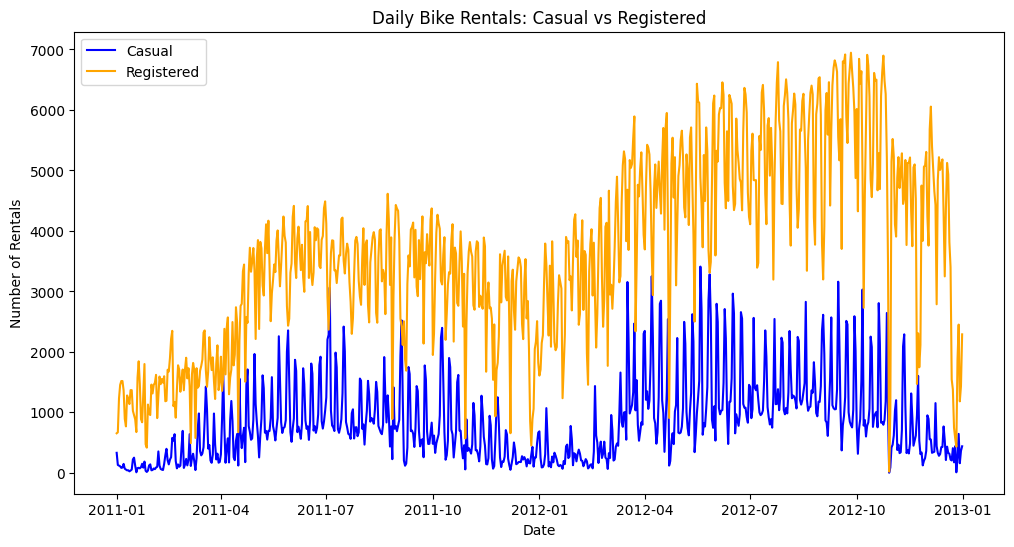

In [ ]:
# Daily Bike Rentals: Casual vs Registered
daily_data = df_hour_data.groupby('dteday')[['casual', 'registered']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x='dteday', y='casual', label='Casual', color='blue')
sns.lineplot(data=daily_data, x='dteday', y='registered', label='Registered', color='orange')
plt.title('Daily Bike Rentals: Casual vs Registered')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()

**Insight**

* Pengguna registered (terdaftar) memiliki jumlah yang konsisten lebih tinggi dibandingkan pengguna casual sepanjang tahun
* Pengguna registered kemungkinan besar menggunakan layanan ini secara rutin, misalnya untuk pergi bekerja atau sekolah.
* Kedua jenis pengguna menunjukkan lonjakan aktivitas selama bulan-bulan musim panas (sekitar Mei hingga September), yang dapat disebabkan oleh cuaca yang mendukung untuk bersepeda.
* Penurunan aktivitas terlihat pada bulan-bulan musim dingin (Desember hingga Februari), kemungkinan karena kondisi cuaca yang kurang mendukung.
* Jumlah pengguna registered mencapai puncak penyewaan harian tertinggi sekitar pertengahan musim panas, dengan beberapa hari mendekati atau melebihi 7000 penyewaan.
* Jumlah pengguna casual mencapai puncak mereka di periode yang sama, meskipun jumlahnya lebih rendah dibanding registered.



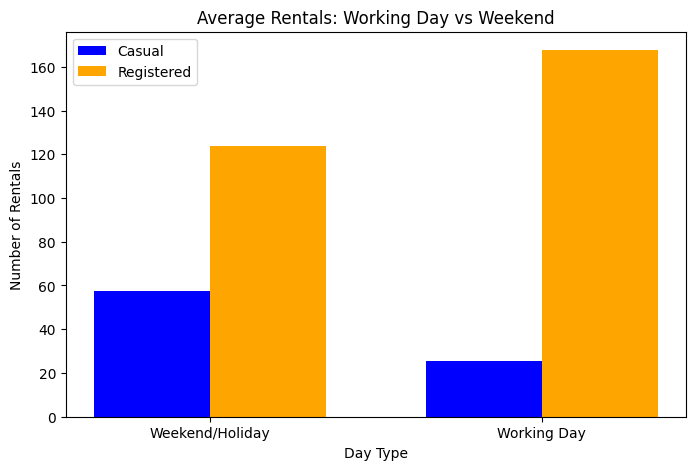

In [ ]:
# Average Rentals: Working Day vs Weekend
# Grouping data by working day
workingday_data = df_hour_data.groupby('workingday')[['casual', 'registered']].mean().reset_index()
workingday_data['day_type'] = workingday_data['workingday'].map({0: 'Weekend/Holiday', 1: 'Working Day'})

# Positions for bars
x = np.arange(len(workingday_data))  # Position of the bars
width = 0.35  # Width of each bar

# Creating the plot
plt.figure(figsize=(8, 5))

# Plotting casual data
plt.bar(x - width / 2, workingday_data['casual'], width, color='blue', label='Casual')

# Plotting registered data
plt.bar(x + width / 2, workingday_data['registered'], width, color='orange', label='Registered')

# Adding title and labels
plt.title('Average Rentals: Working Day vs Weekend')
plt.ylabel('Number of Rentals')
plt.xlabel('Day Type')

# Adding x-tick labels
plt.xticks(x, workingday_data['day_type'])

# Adding a legend
plt.legend()

# Showing the plot
plt.show()

**Insight**

* Data casual menunjukkan tingkat penyewaan lebih tinggi selama akhir pekan atau hari libur dibandingkan hari kerja. Pengguna casual cenderung menggunakan layanan ini untuk keperluan rekreasi atau aktivitas santai.
* Data register menunjukkan tingkat penyewaan lebih tinggi selama hari kerja dibandingkan akhir pekan atau hari libur. Ini menandakan bahwa pengguna terdaftar kemungkinan besar memanfaatkan layanan untuk perjalanan rutin, seperti bekerja atau sekolah.
* Selama hari kerja, pengguna terdaftar sangat mendominasi penyewaan dibandingkan pengguna kasual, mengindikasikan bahwa layanan lebih banyak digunakan oleh orang-orang yang memanfaatkan langganan untuk tujuan harian.


# Pertanyaan 2

## Pada jam-jam berapakah dalam sehari terdapat konsentrasi penyewaan sepeda tertinggi untuk pengguna biasa dan pengguna terdaftar?

**Tahapan analisa:**
1. Agregasikan data casual dan registered berdasarkan hr.
    * Tujuannya untuk menemukan jam konsentrasi tinggi untuk pengguna casual dan registered.
    * Gunakan line plot untuk menunjukkan pola sepanjang hari.

2. Heatmap penyewaan berdasarkan jam (hr) dan hari (weekday) dengan mengagregasikan data penyewaan berdasarkan hr dan weekday.
    * Tujuannya untuk menunjukkan pola penggunaan berdasarkan kombinasi jam dan hari.
    * Gunakan heatmap untuk menggambarkan intensitas penyewaan.

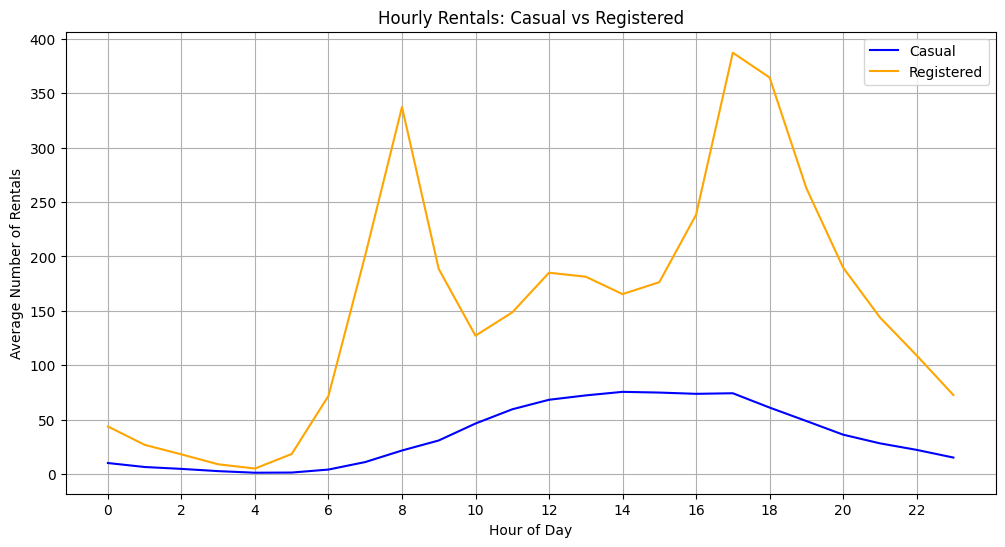

In [ ]:
# Casual & Registered Rentals Line Plot by hour
# Agregasikan data casual dan registered berdasarkan hr
# Gunakan line plot untuk menunjukkan pola sepanjang hari

hourly_data = df_hour_data.groupby('hr')[['casual', 'registered']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_data, x='hr', y='casual', label='Casual', color='blue')
sns.lineplot(data=hourly_data, x='hr', y='registered', label='Registered', color='orange')
plt.title('Hourly Rentals: Casual vs Registered')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Rentals')
plt.legend()
plt.xticks(range(0, 24, 2))
plt.grid(True)
plt.show()

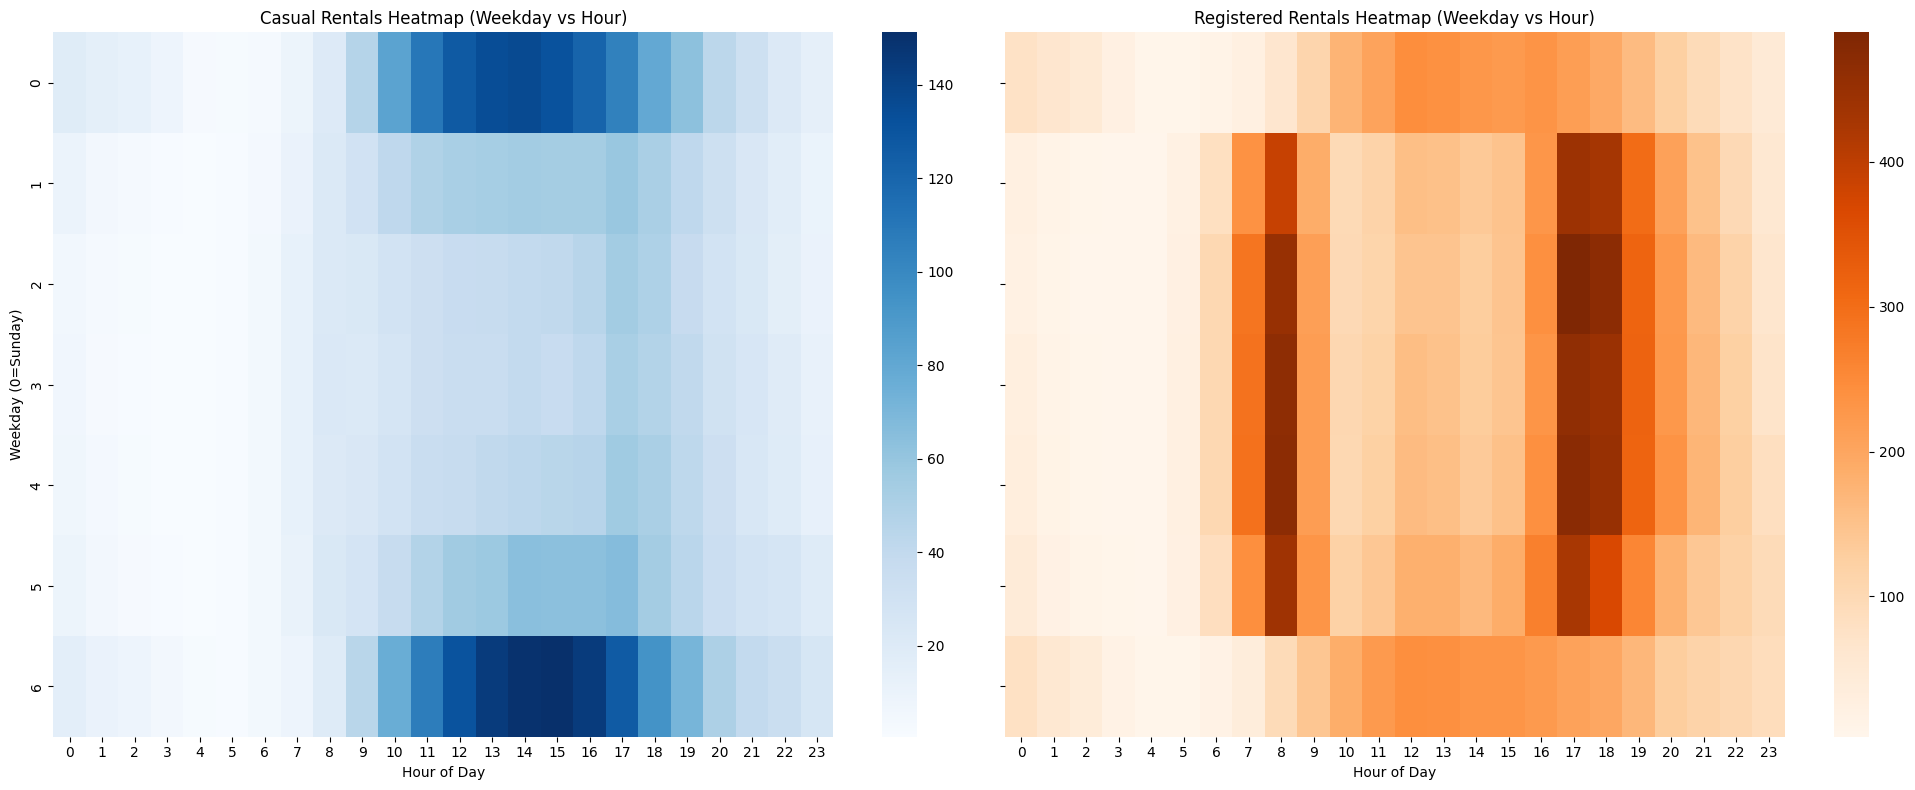

In [ ]:
# Casual & Registered Rentals Heatmap (Weekday vs Hour)
# Agregasikan data casual dan registered berdasarkan weekday dan hr
# Gunakan heatmap untuk menggambarkan intensitas penyewaan

# Preparing data for heatmap
heatmap_data = df_hour_data.groupby(['weekday', 'hr'])[['casual', 'registered']].mean().unstack()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Heatmap for casual
sns.heatmap(heatmap_data['casual'], cmap='Blues', ax=axes[0], annot=False, cbar=True)
axes[0].set_title('Casual Rentals Heatmap (Weekday vs Hour)')
axes[0].set_ylabel('Weekday (0=Sunday)')
axes[0].set_xlabel('Hour of Day')

# Heatmap for registered
sns.heatmap(heatmap_data['registered'], cmap='Oranges', ax=axes[1], annot=False, cbar=True)
axes[1].set_title('Registered Rentals Heatmap (Weekday vs Hour)')
axes[1].set_ylabel('')  # Remove y-label for the second plot for cleaner look
axes[1].set_xlabel('Hour of Day')

# Show plots
plt.tight_layout()
plt.show()

**Insight:**
- Aktivitas penyewaan pelanggan terdaftar (registered) menunjukkan dua puncak utama: pagi (sekitar pukul 8) dan sore (sekitar pukul 17-18).
- Puncak data pada pelanggan registered kemungkinan besar mencerminkan perjalanan rutin pergi dan pulang kerja atau sekolah.
- Aktivitas pelanggan registered menurun signifikan di luar jam sibuk ini, terutama pada malam hari.
- Penyewaan oleh pengguna casual lebih konsisten sepanjang hari tanpa puncak yang tajam.
- Aktivitas pengguna casual mencapai puncaknya di sore hari (sekitar pukul 14-16), yang menunjukkan penggunaan untuk rekreasi atau kegiatan santai.



# Pertanyaan 3

## Bisakah kita mengenali anomali atau kejadian besar (seperti cuaca ekstrem atau hari libur nasional) berdasarkan lonjakan atau penurunan tiba-tiba dalam jumlah penyewaan sepeda?






**Tahapan analisa:**
1. Analisis Lonjakan dan Penurunan Penyewaan, untuk mengidentifikasi lonjakan atau penurunan tiba-tiba.
    * Hitung perbedaan jumlah penyewaan harian. Tambahkan variabel 'change' untuk menyimpan selisih antara total penyewaan (cnt) sepeda dari satu hari ke hari berikutnya (diff()).
    * Gunakan plot garis dengan highlight pada perubahan besar.

2. Analisis Faktor Eksternal untuk mengidentifikasi apakah anomali penyewaan berkaitan dengan kondisi cuaca tertentu.

    * Gabungkan data anomali dengan data cuaca dan kecepatan angin menggunakan kolom dteday.
    * Visualisasikan hubungan antara perubahan harian (change), kecepatan angin (windspeed), dan situasi cuaca (weathersit) menggunakan grafik scatter.
    * Gunakan statistik deskriptif untuk merangkum rata-rata dan standar deviasi perubahan penyewaan (change) dan kecepatan angin (windspeed) berdasarkan weathersit.

3. Analisis Faktor Eksternal untuk mengetahui apakah penyewaan pada hari libur memiliki pola yang berbeda dibandingkan hari biasa.

    * Tambahkan kolom holiday pada dataset hourly_aggregated dan kategorikan data anomali berdasarkan hari libur.
    * Agregasikan data berdasarkan holiday untuk menghitung rata-rata dan jumlah penyewaan harian.
    * Bandingkan rata-rata penyewaan antara hari libur dan hari kerja (non-holiday).
    * Visualisasikan distribusi penyewaan pada hari libur vs. hari biasa.


<ipython-input-97-c4974bb69205>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_data['change'].fillna(0, inplace=True)  # Isi nilai NaN di awal dengan 0


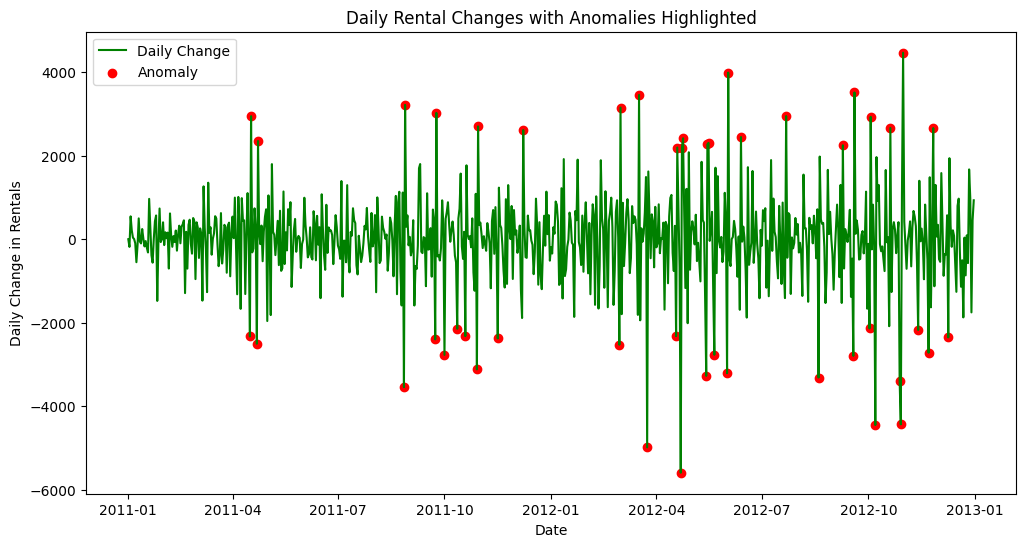

In [ ]:
# Daily Rental Changes with Anomalies Highlighted
# Hitung perbedaan jumlah penyewaan harian.
# Tambahkan variabel 'change' untuk menyimpan selisih antara
# total penyewaan (cnt) sepeda dari satu hari ke hari berikutnya (diff()).
# Gunakan plot garis dengan highlight pada perubahan besar

# === Bagian 1: Deteksi Anomali ===
# 1. Aggregate hourly data to daily data
daily_data = df_hour_data.groupby('dteday').agg({'cnt': 'sum'}).reset_index()

# 2. Calculate daily change
daily_data['change'] = daily_data['cnt'].diff()
daily_data['change'].fillna(0, inplace=True)  # Isi nilai NaN di awal dengan 0

# 3. Identify anomalies
threshold = daily_data['change'].std() * 2  # Ambang batas: 2 * standar deviasi
anomalies = daily_data[abs(daily_data['change']) > threshold]

# 4. Visualize daily rental changes with anomalies highlighted
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x='dteday', y='change', label='Daily Change', color='green')
plt.scatter(anomalies['dteday'], anomalies['change'], color='red', label='Anomaly')
plt.title('Daily Rental Changes with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Daily Change in Rentals')
plt.legend()
plt.show()

**Keterangan**
* Garis hijau adalah perubahan jumlah penyewaan sepeda harian. Secara keseluruhan, fluktuasi berada di sekitar 0, menunjukkan pola harian yang relatif stabil dengan beberapa perubahan signifikan.
* Titik merah adalah anomali (perubahan signifikan yang melebihi threshold berdasarkan dua kali standar deviasi dari rata-rata perubahan). Ini adalah hari-hari ketika perubahan jumlah penyewaan sepeda sangat besar, baik peningkatan atau penurunan.

**Insight**
1. Anomali Positif (Peningkatan Penyewaan Drastis):
    * Titik merah di atas garis 0 menunjukkan peningkatan besar dalam jumlah penyewaan sepeda.
    * Kemungkinan penyebab adalah cuaca cerah, acara khusus atau liburan, perubahan musim (awal musim semi atau musim panas) cenderung meningkatkan jumlah penyewaan.
2. Anomali Negatif (Penurunan Penyewaan Drastis):
    * Titik merah di bawah garis 0 menunjukkan penurunan besar dalam jumlah penyewaan sepeda.
    * Kemungkinan penyebab adalah cuaca buruk, hari libur tertentu, atau bisa juga perbaikan operasional sepeda.
3. Anomali lebih sering terlihat pada tahun 2012 dibandingkan dengan tahun 2011. Hal ini mungkin menunjukkan bahwa penggunaan sepeda menjadi populer di tahun kedua.
4. Perubahan maksimum berkisar antara -5000 hingga +4000. Fluktuasi ini cukup besar dan menunjukkan variabilitas yang tinggi dalam jumlah penyewaan dari hari ke hari.

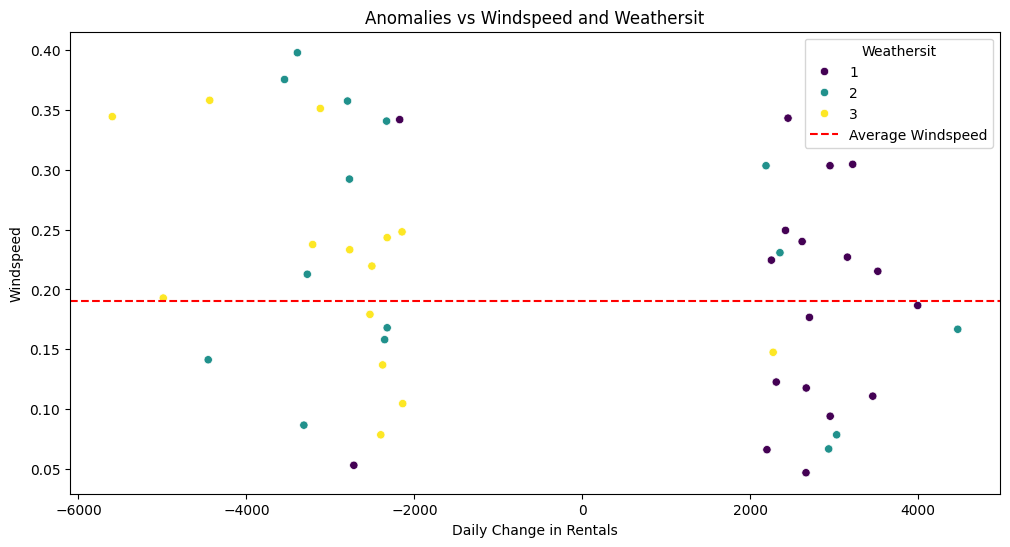

Descriptive Statistics for Anomalies (Weathersit, Windspeed, and Changes):
                 change              windspeed           count_anomalies
                   mean          std      mean       std           count
weathersit                                                              
1           2256.888889  1780.520839  0.190160  0.097657              18
2          -1039.466667  3040.235608  0.225088  0.112905              15
3          -2734.000000  1814.966963  0.219633  0.088446              14


In [ ]:
# === Bagian 2: Analisis Hubungan dengan Kondisi Cuaca ===
# 5. Aggregate hourly data for weather and windspeed
hourly_aggregated = df_hour_data.groupby('dteday').agg({
    'weathersit': lambda x: x.mode()[0],  # Modus untuk kondisi cuaca
    'windspeed': 'mean',                 # Rata-rata kecepatan angin
    'cnt': 'sum'
}).reset_index()

# 6. Merge anomalies with weather data
merged_data = anomalies.merge(hourly_aggregated, on='dteday', how='left')

# 7. Visualize anomalies with windspeed and weathersit
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='change', y='windspeed', hue='weathersit', palette='viridis')
plt.axhline(df_hour_data['windspeed'].mean(), color='red', linestyle='--', label='Average Windspeed')
plt.title('Anomalies vs Windspeed and Weathersit')
plt.xlabel('Daily Change in Rentals')
plt.ylabel('Windspeed')
plt.legend(title='Weathersit')
plt.show()

# 8. Descriptive statistics for anomalies by weathersit
anomalies_weather = merged_data.groupby('weathersit').agg({
    'change': ['mean', 'std'],           # Statistik untuk perubahan penyewaan
    'windspeed': ['mean', 'std'],        # Statistik untuk kecepatan angin
    'dteday': 'count'                    # Jumlah hari anomali
}).rename(columns={'dteday': 'count_anomalies'})

print("Descriptive Statistics for Anomalies (Weathersit, Windspeed, and Changes):")
print(anomalies_weather)

In [ ]:
# Check the distribution of weathersit in the original dataset
print(df_hour_data['weathersit'].value_counts())

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


**Keterangan**

1. Rentang windspeed dalam anomali:
    * Sebagian besar nilai windspeed berada dalam kisaran 0.1 - 0.4, dengan rata-rata 0.2 (ditandai garis merah horizontal).
    * Beberapa anomali dengan perubahan besar (baik positif maupun negatif) berada pada windspeed tinggi (> 0.3), yang umumnya diasosiasikan dengan cuaca buruk.
2. Distribusi Anomali Berdasarkan Weathersit
    * weathersit = 1 (Clear, Few Clouds):
      - Didominasi oleh anomali positif (peningkatan rental sepeda).
      - Rata-rata change: 2256 (positif), menunjukkan bahwa anomali dalam cuaca cerah cenderung berupa peningkatan besar dalam penyewaan sepeda.
      - Standar deviasi change: 1780, menunjukkan variabilitas yang cukup tinggi.
      - Rentang windspeed lebih rendah dibandingkan kondisi lain (rata-rata 0.19). Kondisi cerah dan kecepatan angin lebih rendah bisa meningkatkan penyewaan.
    * weathersit = 2 (Mist, Cloudy):
      - Campuran anomali positif dan negatif.
      - Rata-rata change: -1039 (negatif), menunjukkan bahwa anomali di cuaca berkabut atau berawan cenderung berupa penurunan penyewaan.
      - Standar deviasi change: 3040, yang lebih tinggi dibandingkan weathersit = 1, mengindikasikan pengaruh yang lebih acak.
      - Rata-rata windspeed 0.225, menunjukkan angin yang lebih kuat.
    * weathersit = 3 (Light Snow/Rain):
      - Didominasi oleh anomali negatif (penurunan rental sepeda).
      - Rata-rata change -2734 (negatif), anomali dalam kondisi hujan/salju cenderung menyebabkan penurunan besar penyewaan.
      - Standar deviasi change: 1814, serupa dengan weathersit = 1, menunjukkan variabilitas yang cukup tinggi.
      - Rata-rata windspeed 0.22, menunjukkan kecepatan angin cukup tinggi dalam kondisi ini.
      - Kondisi hujan ringan atau salju mengurangi penyewaan, bahkan jika kecepatan angin rendah.


**Insight**
1. Pengaruh Cuaca terhadap Anomali:
    * Cuaca cerah (weathersit = 1) mendukung peningkatan signifikan dalam penyewaan sepeda meskipun ada anomali.
    * Cuaca buruk (weathersit = 3) mengurangi penyewaan secara drastis, terlepas dari kecepatan angin.
2. Pengaruh Kecepatan Angin:
    * Kecepatan angin memiliki korelasi moderat dengan anomali
    * Pada kecepatan angin rendah (sekitar 0.2), cenderung terjadi peningkatan penyewaan (anomali positif), terutama pada cuaca cerah.
    * Pada kecepatan angin tinggi (> 0.3), cenderung terjadi penurunan penyewaan, terutama pada kondisi berkabut atau hujan.
3. Variasi Berdasarkan Weathersit:
    * Variasi (standar deviasi) paling tinggi ada di weathersit = 2, menunjukkan bahwa cuaca berawan/kabut lebih sulit diprediksi efeknya terhadap anomali.

# Analisis Lanjutan : Clustering Berdasarkan Cuaca

## Clustering menggunakan teknik berbasis aturan (rule-based) untuk mengelompokkan data berdasarkan variabel weathersit.

   Weathersit  Mean Rentals (cnt)  Rentals Std (cnt)  Casual Rentals  \
0           1          204.869272         189.487773       40.545431   
1           2          175.165493         165.431589       29.595290   
2           3          111.579281         133.781045       16.055673   
3           4           74.333333          77.925178        2.666667   

   Registered Rentals  Average Temp  Average Windspeed  Average Humidity  
0          164.323841      0.511054           0.190553          0.573747  
1          145.570202      0.474445           0.179973          0.698807  
2           95.523608      0.456688           0.218825          0.827632  
3           71.666667      0.186667           0.204000          0.883333  


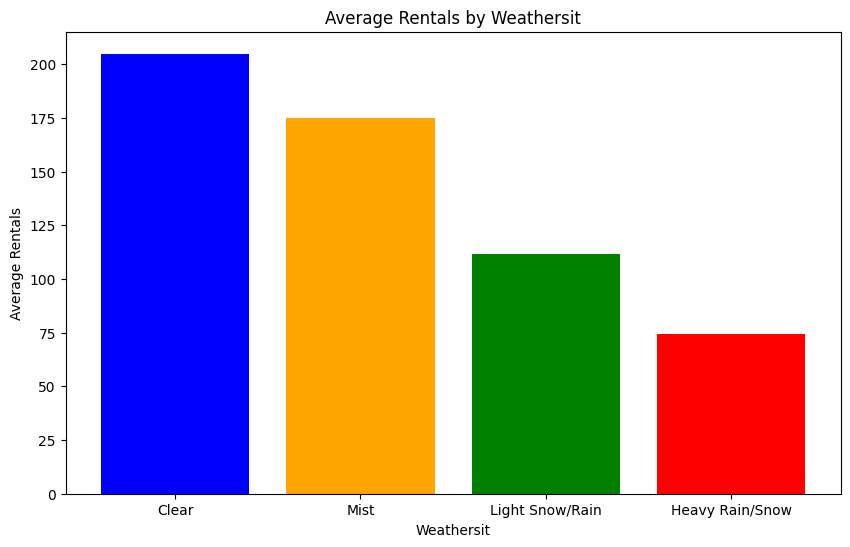

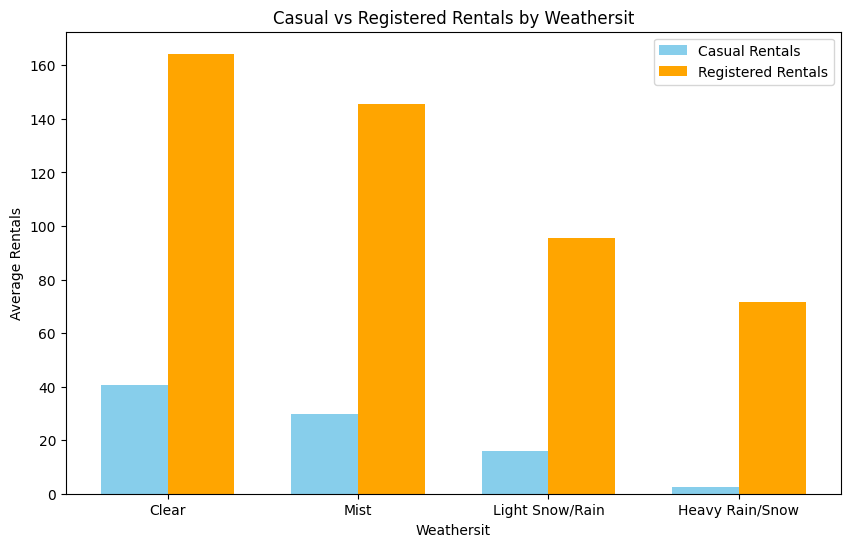

In [ ]:
# Group data by weathersit
weathersit_clusters = df_hour_data.groupby('weathersit').agg({
    'cnt': ['mean', 'std'],       # Rata-rata dan standar deviasi penyewaan
    'casual': 'mean',             # Rata-rata penyewaan casual
    'registered': 'mean',         # Rata-rata penyewaan terdaftar
    'temp': 'mean',               # Suhu rata-rata
    'windspeed': 'mean',          # Kecepatan angin rata-rata
    'hum': 'mean',                # Kelembapan rata-rata
}).reset_index()

# Rename columns for better readability
weathersit_clusters.columns = [
    'Weathersit', 'Mean Rentals (cnt)', 'Rentals Std (cnt)',
    'Casual Rentals', 'Registered Rentals',
    'Average Temp', 'Average Windspeed', 'Average Humidity'
]

# Display clustered data
print(weathersit_clusters)

# Visualization: Bar plot for average rentals across different weathersit
plt.figure(figsize=(10, 6))
plt.bar(weathersit_clusters['Weathersit'], weathersit_clusters['Mean Rentals (cnt)'], color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Weathersit')
plt.ylabel('Average Rentals')
plt.title('Average Rentals by Weathersit')
plt.xticks(ticks=weathersit_clusters['Weathersit'], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()

# Visualization: Comparing registered and casual rentals across weathersit
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = weathersit_clusters['Weathersit']

plt.bar(index - bar_width/2, weathersit_clusters['Casual Rentals'], bar_width, label='Casual Rentals', color='skyblue')
plt.bar(index + bar_width/2, weathersit_clusters['Registered Rentals'], bar_width, label='Registered Rentals', color='orange')

plt.xlabel('Weathersit')
plt.ylabel('Average Rentals')
plt.title('Casual vs Registered Rentals by Weathersit')
plt.xticks(ticks=weathersit_clusters['Weathersit'], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.legend()
plt.show()

## Conclusion

**Conclusion pertanyaan 1**
- Data ini memperlihatkan pentingnya peran layanan sepeda sebagai alat transportasi harian bagi pengguna terdaftar, sementara bagi pengguna casual, sepeda lebih banyak digunakan untuk aktivitas rekreasi.
- Peningkatan fasilitas dan ketersediaan sepeda selama hari kerja mungkin lebih penting untuk memenuhi kebutuhan pengguna terdaftar.
- Pada akhir pekan, fokus pada penyewaan casual, seperti promosi atau kampanye wisata bersepeda, dapat menarik lebih banyak pengguna.

**Conclusion pertanyaan 2**
- Pengguna registered mendominasi penyewaan selama jam sibuk (pagi dan sore), mengindikasikan penggunaan layanan sebagai alat transportasi utama.
- Pengguna casual memiliki volume penyewaan yang jauh lebih rendah dibandingkan pengguna terdaftar, tetapi konsisten sepanjang hari.
- Perbedaan pola ini mengindikasikan bahwa pengguna terdaftar lebih terikat pada jadwal harian (misalnya, pekerjaan atau sekolah), sementara pengguna casual lebih fleksibel dalam memilih waktu penyewaan.
- Untuk memberi pelayanan maksimal kepada pengguna registered, ketersediaan sepeda selama jam sibuk (pagi dan sore) sangat penting.
- Untuk pengguna casual, bisa digunakan promosi dan layanan tambahan di sore hari atau akhir pekan agar dapat meningkatkan penyewaan.

**Conclusion pertanyaan 3**
- Cuaca cerah cenderung meningkatkan penyewaan meskipun ada anomali, sementara cuaca buruk menurunkan penyewaan.
- Kecepatan angin berpengaruh, tetapi efeknya lebih signifikan ketika dikombinasikan dengan kondisi cuaca tertentu.
